In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the dataset into a pandas DataFrame
insurance_data = pd.read_csv("insurance - insurance.csv")

# Display the first few rows of the DataFrame
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Exploratory Data Analysis

In [4]:
#checking information on the dataset
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#checking missing values
insurance_data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
#checking the shape of the dataset
insurance_data.shape

(1338, 7)

We can see that the given dataset is made up of 7 columns and 1338 rows, and luckly we don't have null values

In [7]:
#checking the summary statistics of the dataset
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
#checking the statistical info of the charges variable
charges_summary = insurance_data['charges'].describe()

# Convert the summary into a DataFrame
charges_summary_df = charges_summary.to_frame()

In [9]:
charges_summary_df

,charges
count,1338.000000
mean,13270.422265
std,12110.011237
min,1121.873900
25%,4740.287150
50%,9382.033000
75%,16639.912515
max,63770.428010


the summary statistics indicate that medical charges vary widely, with a high average cost of around $13,270, but with a 
very large range  (from $1,122 to $63,770). 

The data is likely right-skewed, meaning there are a few very high charges that are pushing the average up. Most people have charges less than $16,640, but the wide range suggests there are some extreme cases or possibly outliers in the dataset.

In [10]:
#count number of people in each region
region_counts = insurance_data['region'].value_counts()

# Convert the counts to a table format
region_counts_df = region_counts.to_frame(name='Number of People')

#reset the index to have 'region' as a column
region_counts_df.reset_index(inplace=True)
region_counts_df.rename(columns={'index': 'Region'}, inplace=True)

region_counts_df

,Region,Number of People
0,southeast,364
1,southwest,325
2,northwest,325
3,northeast,324


# Feature Relationship

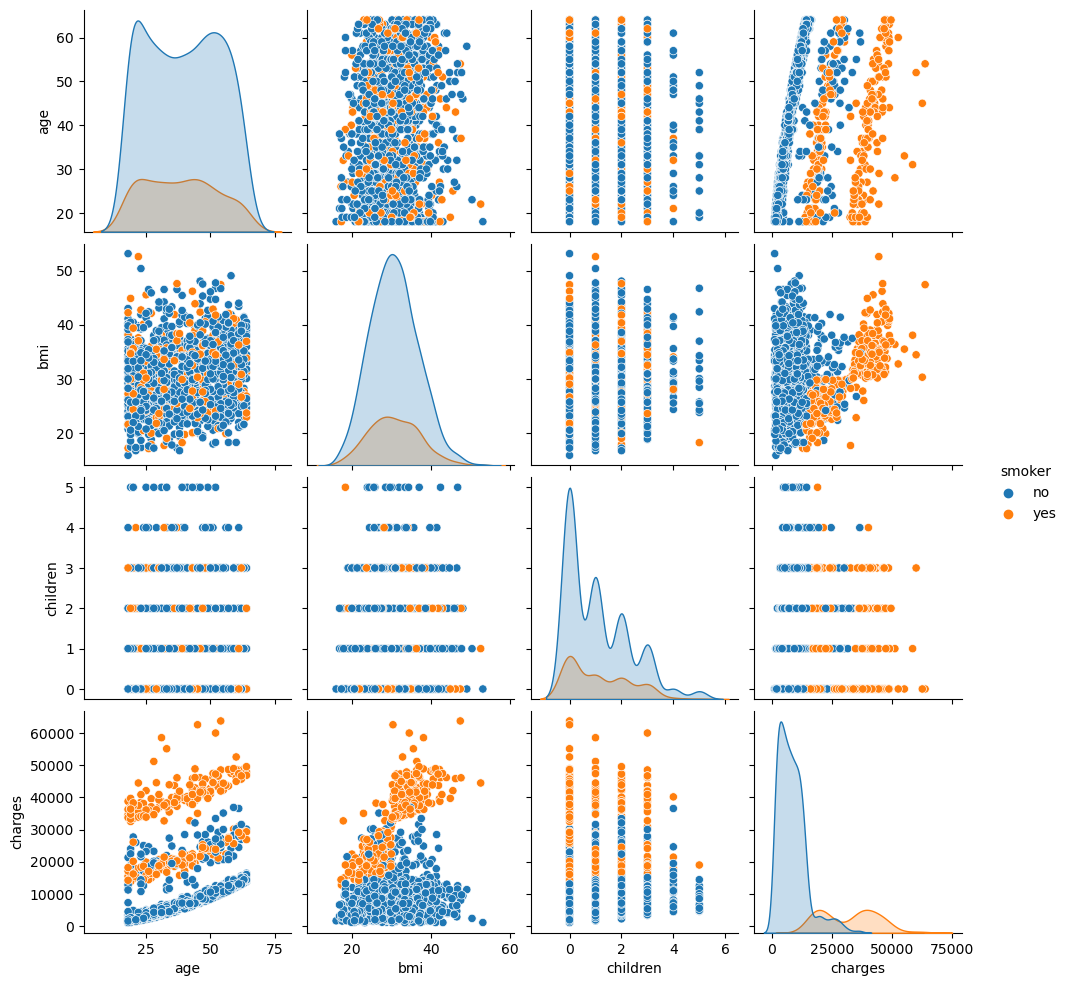

In [11]:
#Convert categorical variables to category types for better plotting
insurance_data['sex'] = insurance_data['sex'].astype('category')
insurance_data['smoker'] = insurance_data['smoker'].astype('category')
insurance_data['region'] = insurance_data['region'].astype('category')

#Using seaborn to create a pairplot
sns.pairplot(insurance_data, hue='smoker', diag_kind='kde')
plt.show()

Age vs. Charges: Three different groups or tendencies seem to be present. This could point to the influence of another variable, such as smoker status, or differing baseline charges for various age groups.

BMI vs. Charges: Charges and BMI have a favorable relationship that is particularly apparent for smokers (shown in orange). Smokers appear to pay noticeably more when their BMI is greater.

Children vs. Charges: The relationship between the number of children and charges doesn't seem to be clearly trending. Regardless of the number of children, smokers typically face greater charges.

Smoker Status: The charges appear to be significantly influenced by the smoker's status. Smokers at all BMIs and age groups continuously face rising fees.

Distributions: The diagonal shows the distributions of the individual variables. For age, BMI, and children, the distributions are relatively uniform or normal, but for charges, the distribution is right-skewed, indicating that a smaller number of individuals have very high medical charges.

The most important insight is that smoking clearly affects medical costs and that BMI and charges are positively correlated, particularly for smokers. It's also clear that different age groups can have distinct patterns of medical expenses, suggesting that age may be a significant factor in charge prediction.

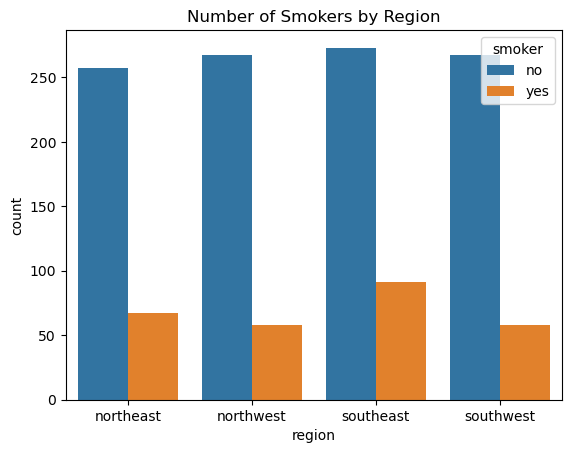

In [12]:
#plot number of smokers by region 
sns.countplot(x='region', hue='smoker', data=insurance_data)
plt.title('Number of Smokers by Region')
plt.show()

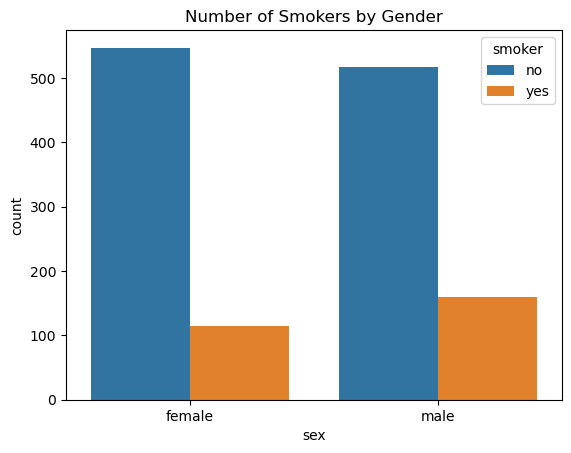

In [13]:
# plot number of smokers by gender
sns.countplot(x='sex', hue='smoker', data=insurance_data)
plt.title('Number of Smokers by Gender')
plt.show()

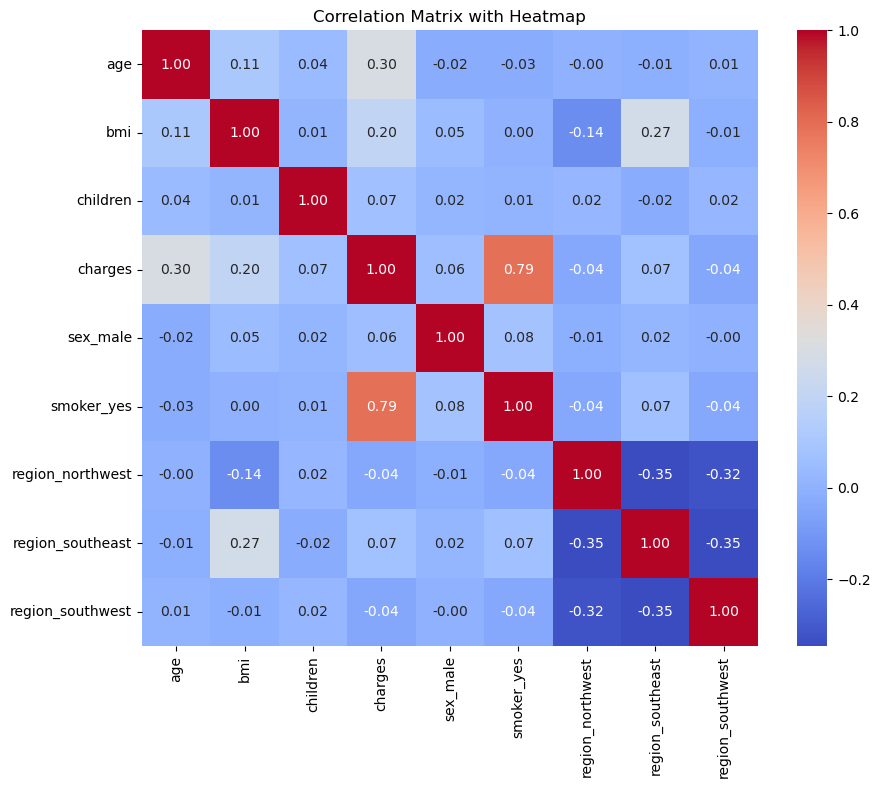

In [14]:
# Convert categorical variables to numerical ones
df_encoded = pd.get_dummies(insurance_data, drop_first=True)

# Compute the correlation matrix
corr = df_encoded.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix with Heatmap')
plt.show()

Smoking and Charges: There's a strong positive correlation (0.79) between being a smoker and insurance charges, suggesting that smokers tend to have significantly higher medical charges than non-smokers.

Age and Charges: A moderate positive correlation (0.30) indicates that as age increases, medical charges tend to increase as well, which is expected as older individuals may require more medical care.

BMI and Charges: There is a positive correlation (0.20) between BMI and charges. While not as strong as the smoker correlation, it suggests that higher BMI is associated with higher medical costs.

Region and Charges: Different regions have varying degrees of negative correlation with charges, with the southeast having a slight positive correlation (0.07). This might indicate regional differences in charges, but the correlation is not very strong.

Children and Charges: There's a weak positive correlation (0.07), suggesting having more children has a slight association with higher charges, but it's not a strong relationship.

Sex and Charges: Gender (male) has a very weak correlation with charges, indicating that sex is not a strong predictor of insurance charges in this dataset.

The strongest takeaway is the impact of smoking status on medical charges, which could be a key variable for predicting insurance costs. Additionally, while age and BMI are also correlated with charges, their effects are not as pronounced as smoking. The weak correlations between the other features and charges suggest they may have less predictive power. 

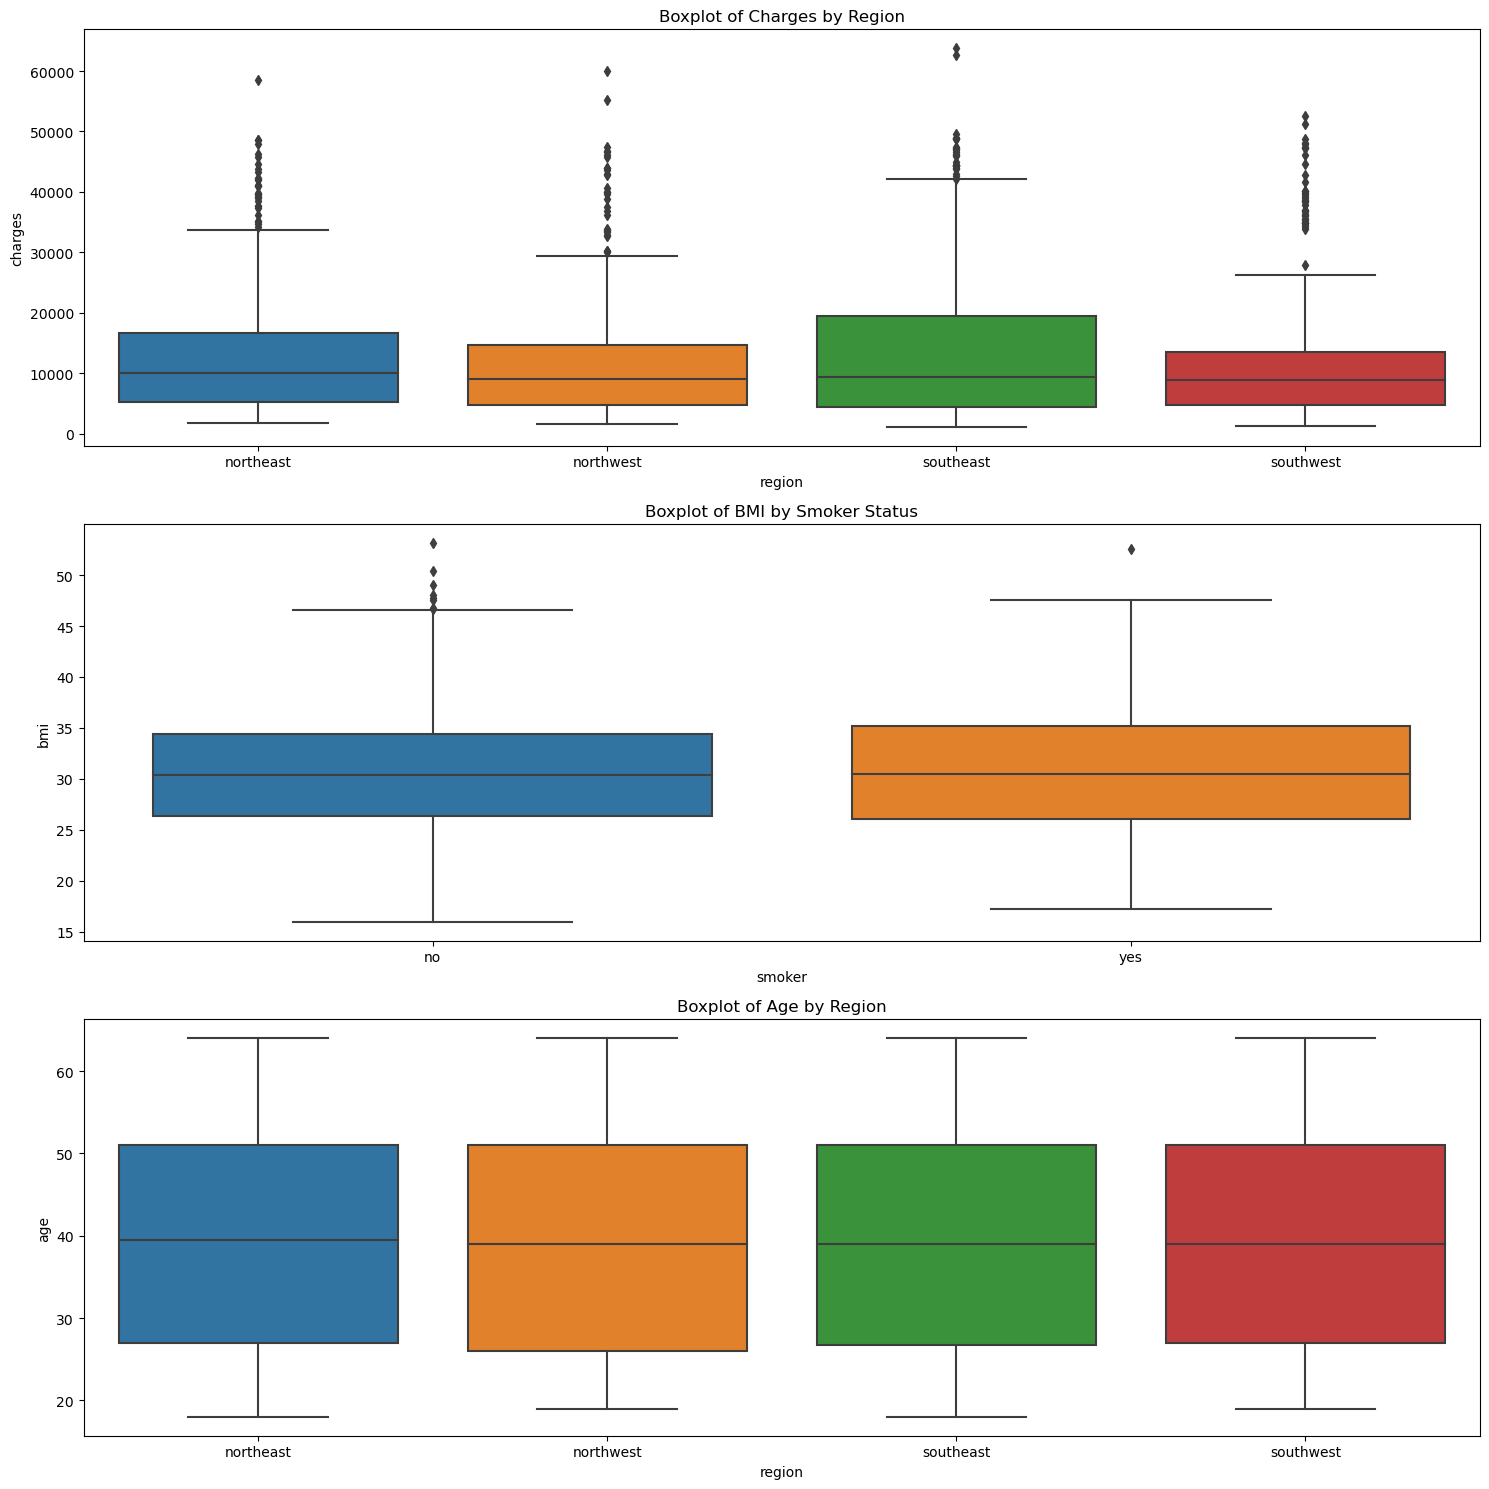

In [15]:
def plot_boxplots(data, numerical_columns, category_columns, titles):
    """
    Plots a series of boxplots for specified numerical columns against category columns.
    
    :param data: pandas DataFrame containing the data.
    :param numerical_columns: list of strings, names of the numerical columns in the data.
    :param category_columns: list of strings, names of the categorical columns in the data.
    :param titles: list of strings, titles for each subplot.
    """
    
    num_plots = len(numerical_columns)
    
    plt.figure(figsize=(15, 5 * num_plots))
    
    for index, (num_col, cat_col, title) in enumerate(zip(numerical_columns, category_columns, titles), 1):
        plt.subplot(num_plots, 1, index)
        sns.boxplot(x=cat_col, y=num_col, data=data)
        plt.title(title)
    
    plt.tight_layout()
    plt.show()


numerical_columns = ['charges', 'bmi', 'age']
category_columns = ['region', 'smoker', 'region']
titles = ['Boxplot of Charges by Region', 'Boxplot of BMI by Smoker Status', 'Boxplot of Age by Region']

# Call the function with the dataset and the columns to plot
plot_boxplots(insurance_data, numerical_columns, category_columns, titles)


From the boxplots, we can infer that while smoker status doesn't significantly affect BMI, regionality seems to affect medical charges. Additionally, the large number of outliers in the charges could indicate that there are individuals with particularly high medical expenses, which could be influenced by factors not shown in the boxplot, such as chronic conditions or severe illnesses. The consistency in age distribution suggests that age alone, without considering other factors like smoker status or BMI, might not vary significantly in different regions.

# Train the model

In [16]:
def train_evaluate_model(df, target='charges', test_size=0.2, random_state=42):
    """
    This function takes in a DataFrame, the target column name, the test set size,
    and a random state for reproducibility. It prepares the data, splits it into 
    training and testing sets, trains a linear regression model, and evaluates it.

    Args:
    df (DataFrame): The data to use for training and testing.
    target (str): The name of the target variable column.
    test_size (float): The proportion of the dataset to include in the test split.
    random_state (int): A seed used by the random number generator for reproducibility.

    Returns:
    None
    """
    
    # Prepare the data
    df_with_dummies = pd.get_dummies(df, drop_first=True)
    
    # Define features and target
    X = df_with_dummies.drop(target, axis=1)
    y = df_with_dummies[target]
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate and print the performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error: {mse:.2f}')
    print(f'R-squared: {r2:.2f}')

    # Return the model and performance metrics for further use if needed
    return model, mse, r2

In [17]:
# Convert categorical variables to dummy variables
df_with_dummies = pd.get_dummies(insurance_data, drop_first=True)

In [18]:
model1, mse, r2 = train_evaluate_model(insurance_data)

Mean Squared Error: 33596915.85
R-squared: 0.78


# Model Improvement

In [19]:
# Adding a non-linear transformation of the 'age' feature
df_with_dummies['age_squared'] = df_with_dummies['age']**2

model, mse_non_linear, r2_non_linear = train_evaluate_model(df_with_dummies)

Mean Squared Error: 33156805.92
R-squared: 0.79


# Model interaction with efects of obesity and smokers

In [20]:
# Define obesity as BMI > 30
df_with_dummies['obesity'] = (df_with_dummies['bmi'] > 30).astype(int)

# Create an interaction term for smoker and obesity
df_with_dummies['smoker_obesity_interaction'] = df_with_dummies['smoker_yes'] * df_with_dummies['obesity']

model, mse_smoker_effects, r2_smoker_effects = train_evaluate_model(df_with_dummies)

Mean Squared Error: 17914757.85
R-squared: 0.88


In [52]:
# Save the model for latter usage
with open('best_model.pkl', 'wb') as file:
    pickle.dump(model, file)